In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import imutils
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random

## Read annotation file ##

In [2]:
data = pd.read_csv("./data/raw_dataset/flickr_logos_27_dataset_training_set_annotation.txt",
                sep=" ", header=None)
data.drop(data.columns[-1],axis=1, inplace=True)
data.columns=["filename","label","subset","x1","y1","x2","y2"]
# shuffle the datasets
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,filename,label,subset,x1,y1,x2,y2
0,3733440395.jpg,Apple,6,229,201,262,234
1,2974365916.jpg,Starbucks,5,266,81,318,190
2,4417603925.jpg,Ford,5,153,193,272,246
3,3117510822.jpg,Pepsi,4,6,16,71,92
4,3571544780.jpg,Ferrari,3,72,17,442,372


## Visualize Data ##

In [3]:
def show_image(id):
    fig = plt.figure()
    image = os.path.join("./data/raw_dataset/flickr_logos_27_dataset_images/",data.loc[id]["filename"])
    image = cv2.imread(image)
    cv2.rectangle(image,(data["x1"].iloc[id], data["y1"].iloc[id]),(data["x2"].iloc[id], data["y2"].iloc[id]),
                 (255, 0, 0), 5)
    plt.figure(8)
    plt.imshow(image)

<Figure size 432x288 with 0 Axes>

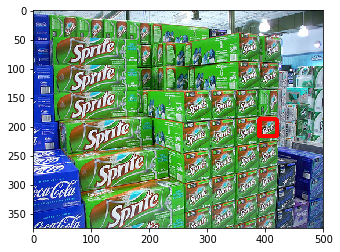

In [4]:
id = random.randint(0,len(data))
show_image(id)

## Crop images and generate training set and test set ##

In [8]:
def crop_img(id):
    image = os.path.join("./data/raw_dataset/flickr_logos_27_dataset_images/",data.loc[id]["filename"])
    image = cv2.imread(image)
    crop_image = image[data["y1"].iloc[id]:data["y2"].iloc[id],data["x1"].iloc[id]:data["x2"].iloc[id]]
    return crop_image
  
WIDTH = 64
HEIGHT = 64

for id, name in enumerate(data["filename"]):
    cropped_image = crop_img(id)
    try:
        resized_image = cv2.resize(cropped_image,(WIDTH,HEIGHT),interpolation=cv2.INTER_CUBIC)
    except:
        print(id)
        continue
    if data.iloc[id]["label"] == 'Pepsi' or data.iloc[id]["label"] == 'Cocacola':
        image_name = str(id)+"_"+data.iloc[id]["label"]+".jpg"
    else:
        image_name = str(id)+"_bkg.jpg"
    cv2.imwrite(os.path.join("./data/new_dataset/",image_name),resized_image)

256
655
1561
1816
4269


Let's see how is problem data look like...

In [6]:
data.iloc[44]

filename    3577850173.jpg
label              Citroen
subset                   6
x1                     284
y1                     246
x2                     317
y2                     276
Name: 44, dtype: object